In [1]:
import joblib
import sys
sys.path.insert(0,'/Users/walfits/Repositories/Aglaia/')
import energies_NN as nn
import numpy as np
from sklearn import model_selection as modsel
import pandas as pd
import seaborn as sns

In [2]:
# Loading the data
data = joblib.load("cc_kjmol_invdist.bz")
X = data["X"]
y = np.reshape(data["y"], (data["y"].shape[0],))

print(X.shape, y.shape)

(20698, 21) (20698,)


In [3]:
# Splitting the data
X_train, X_test, y_train, y_test = modsel.train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(16558, 21)


In [5]:
# Training the model
estimator = nn.Energies_NN(max_iter=20000, learning_rate_init=0.028, hidden_layer_sizes=(3,), batch_size=1000,
                              alpha=0.0066, tensorboard=False)

In [6]:
estimator.fit(X_train, y_train)

In [7]:
estimator.scoreFull(X_test, y_test)

(0.89248503259563006,
 25.445144754261534,
 18.548811694357507,
 166.04985390574438,
 157.16179046657635)

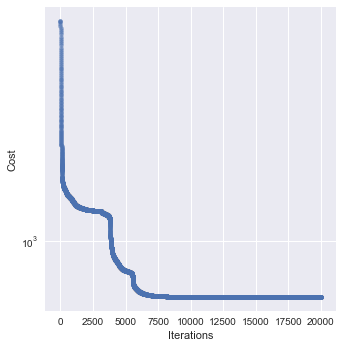

In [8]:
estimator.plot_cost()

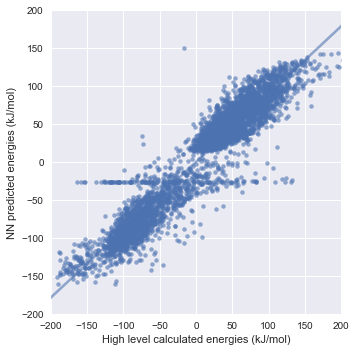

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
y_pred = estimator.predict(X_test)
df = pd.DataFrame()
df['High level calculated energies (kJ/mol)'] = y_test
df['NN predicted energies (kJ/mol)'] = y_pred
lm = sns.lmplot('High level calculated energies (kJ/mol)', 'NN predicted energies (kJ/mol)', data=df,
                scatter_kws={"s": 20, "alpha": 0.6}, line_kws={"alpha": 0.5})
lm.set(ylim=(-200,200), xlim=(-200,200))
plt.show()

In [10]:
np.random.seed(seed=1)
random_input = abs(np.random.rand(21))
alpha_l1 = [[0.0000001], [0.0000005], [0.000001], [0.00005], [0.00001], [0.0001], [0.0005], [0.001],[ 0.005], [0.01], [0.05], [0.1], [0.5], [1]]

In [11]:
all_data = []
the_mean = np.mean(X_train, axis=0)
for al in alpha_l1:
    estimator.optimise_input_no_diag(random_input, al, 0, the_mean, 5000, 0.0005)
    all_data.append(estimator.final_x_tot)

The activations at the end of the optimisations are:
[array([[ 0.99997318]], dtype=float32), array([[ 0.99998701]], dtype=float32), array([[ 0.9999907]], dtype=float32)]
The activations at the end of the optimisations are:
[array([[ 0.99997318]], dtype=float32), array([[ 0.99998701]], dtype=float32), array([[ 0.99999249]], dtype=float32)]
The activations at the end of the optimisations are:
[array([[ 0.99997318]], dtype=float32), array([[ 0.99998701]], dtype=float32), array([[ 0.99999261]], dtype=float32)]
The activations at the end of the optimisations are:
[array([[ 0.99997211]], dtype=float32), array([[ 0.99998689]], dtype=float32), array([[ 0.99999022]], dtype=float32)]
The activations at the end of the optimisations are:
[array([[ 0.99997294]], dtype=float32), array([[ 0.99998701]], dtype=float32), array([[ 0.99999177]], dtype=float32)]
The activations at the end of the optimisations are:
[array([[ 0.99997199]], dtype=float32), array([[ 0.99998677]], dtype=float32), array([[ 0.999

In [22]:
node = 2
dfc = pd.DataFrame()
alpha_l1_list = [0.0000001, 0.0000005, 0.000001, 0.00005, 0.00001, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
dfc["log_alpha"]=-np.log(alpha_l1_list)
features = []

for i in range(len(all_data[0][0])): # 0-27
    fi = []
    for j in range(len(all_data)):   # 0-5
        fi.append(all_data[j][node][i])
    features.append(fi)
    
print(len(features))
print(len(features[0]))

21
14


In [23]:
# cols = ["C1", "C1H1", "C1H2", "C1H3", "C1H4", "C1C2", "C1N", "H1", "H1H2", "H1H3", "H1H4", "H1C2", "H1N", "H2", "H2H3", "H2H4", "H2C2", "H2N", "H3", "H3H4", "H3C2", "H3N", "H4", "H4C2", "H4N", "C2", "C2N", "N"]
cols = ["C1H1", "C1H2", "C1H3", "C1H4", "C1C2", "C1N", "H1H2", "H1H3", "H1H4", "H1C2", "H1N", "H2H3", "H2H4", "H2C2", "H2N", "H3H4", "H3C2", "H3N", "H4C2", "H4N", "C2N"]
for i in range(len(features)):
    name = cols[i]
    dfc[name] = features[i]

dfc.head()

,log_alpha,C1H1,C1H2,C1H3,C1H4,C1C2,C1N,H1H2,H1H3,H1H4,...,H2H3,H2H4,H2C2,H2N,H3H4,H3C2,H3N,H4C2,H4N,C2N
0,16.118096,-0.548072,-0.140416,-0.731284,-0.442023,-0.283362,-0.053302,-0.413691,-0.274162,-0.234013,...,0.079549,-0.379677,0.513545,-0.326886,0.026842,-0.070646,0.160690,-0.293290,-0.187844,0.084551
1,14.508658,-0.438877,-0.093283,-0.640024,-0.351501,-0.174152,0.038614,-0.308622,-0.165615,-0.127157,...,-0.006432,-0.271508,0.410152,-0.313655,-0.060909,-0.095177,0.071786,-0.183994,-0.103844,0.093829
2,13.815511,-0.388766,-0.090388,-0.592577,-0.304343,-0.124033,0.086312,-0.258873,-0.115732,-0.094899,...,-0.051903,-0.221697,0.360204,-0.263510,-0.098922,-0.092773,0.025237,-0.133626,-0.101125,0.090021
3,9.903488,-0.065378,-0.071252,-0.162129,0.088337,-0.065808,0.089478,-0.083769,-0.072735,-0.078880,...,-0.074164,-0.075132,0.087478,-0.089184,-0.078512,-0.075828,-0.081393,-0.047998,-0.087522,0.071506
4,11.512925,-0.075991,-0.079803,-0.208787,0.077660,-0.075939,0.095043,-0.089586,-0.080827,-0.085611,...,-0.081834,-0.081911,0.092425,-0.094466,-0.085849,-0.082719,-0.087343,-0.069546,-0.092258,0.079847


In [24]:
# filename = "l1_scan_" + str(node) + "_seed_"+ str(2) + ".csv"
# dfc.to_csv(filename)

In [25]:
# node = 7
# dfc = pd.read_csv("l1_scan_7.csv", index_col=0)
# dfc.head()

In [26]:
df_melt = dfc.melt('log_alpha', var_name='cols',  value_name='vals')

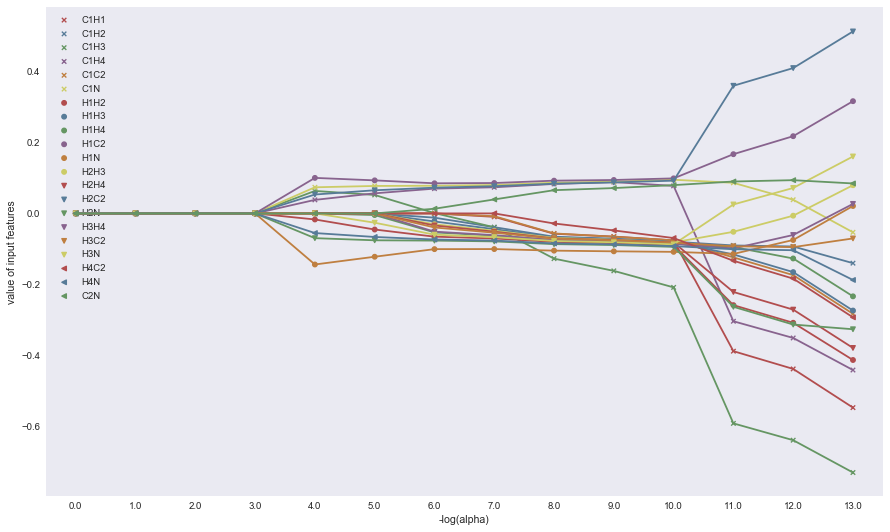

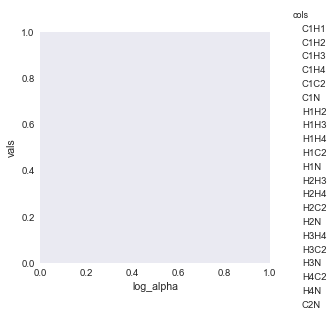

In [27]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

sns.set_style("darkgrid", {'axes.grid' : False})
sns.set_context("paper", font_scale=1.2 , rc={"lines.linewidth": 1})

fig, ax = plt.subplots()
fig.set_size_inches(15, 9)


markers = ['x','x','x','x','x','x','o','o','o','o','o','o','v','v','v','v','v','v','<','<','<','<','<','<','s','s','s','s']
line_style = ["-","-","-","-","-","-","-","-","-",":",":",":",":",":",":",":",":",":","--","--","--","--","--","--","--","--","--","--"]
the_plot = sns.factorplot(x="log_alpha", y="vals", hue='cols', data=df_melt, ax=ax, palette=sns.color_palette("Set1", desat=0.5),  markers=markers)
ax.set(xlabel='-log(alpha)', ylabel='value of input features')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.legend(loc='upper left')
# ax.set_ylim((-0.01,0.2))
name = "node" + str(node) + ".png"
fig.savefig(name, transparent=False, dpi=100)


plt.show()